# Physical Space and the Image Grid

### Learning Objectives

* Understand how an **image pixel grid** is defined in **physical space**
* Understand how a **spatial transform** *defines the map between two physical spaces*
* Understand **how to define a resampling operation** to generate a new image grid
* Understand the **role of image interpolators**, and become familiar with a few common interpolators

## Overview

### Physical Space, Images, and the Pixel Grid

When performing image registration, where the object is to find the spatial transform that maps between the fixed image space and the moving image space, it is **extremely important** to have clear definitions of **physical space**, aka **world space**, and how images live in these spaces.

Once we have *good definitions* and *follow them consistently*, operations such resampling, interpolation, multi-resolution processing, and spatial transform as are **clear** and **correct**, even on images that **anisotropic**, **oriented**, or with **multi-component tensor pixels**, such as gradient vectors or diffusion tensors.

### Problem: Register a Human Lung Volume from Two Time Points

Given a problem to register x-ray computed tomography (CT) images of a human lung taken at two time points, **what must be supported?**

In image registration, we typically identify the two images as the **fixed** and **moving** image. Our goal is to **find the spatial transformation that makes the moving image so align with the fixed image**. Our fixed image was acquired from the patient at a baseline time point, and our moving image was acquired at a follow-up time point.

First, let's examine our fixed and moving images.

In [1]:
import itk

from packaging.version import parse
from importlib.metadata import version

if parse(version('itk')) < parse('5.3'):
    raise ValueError("ITK greater than version 5.3.0 is required for this notebook")

from itkwidgets import view, compare_images


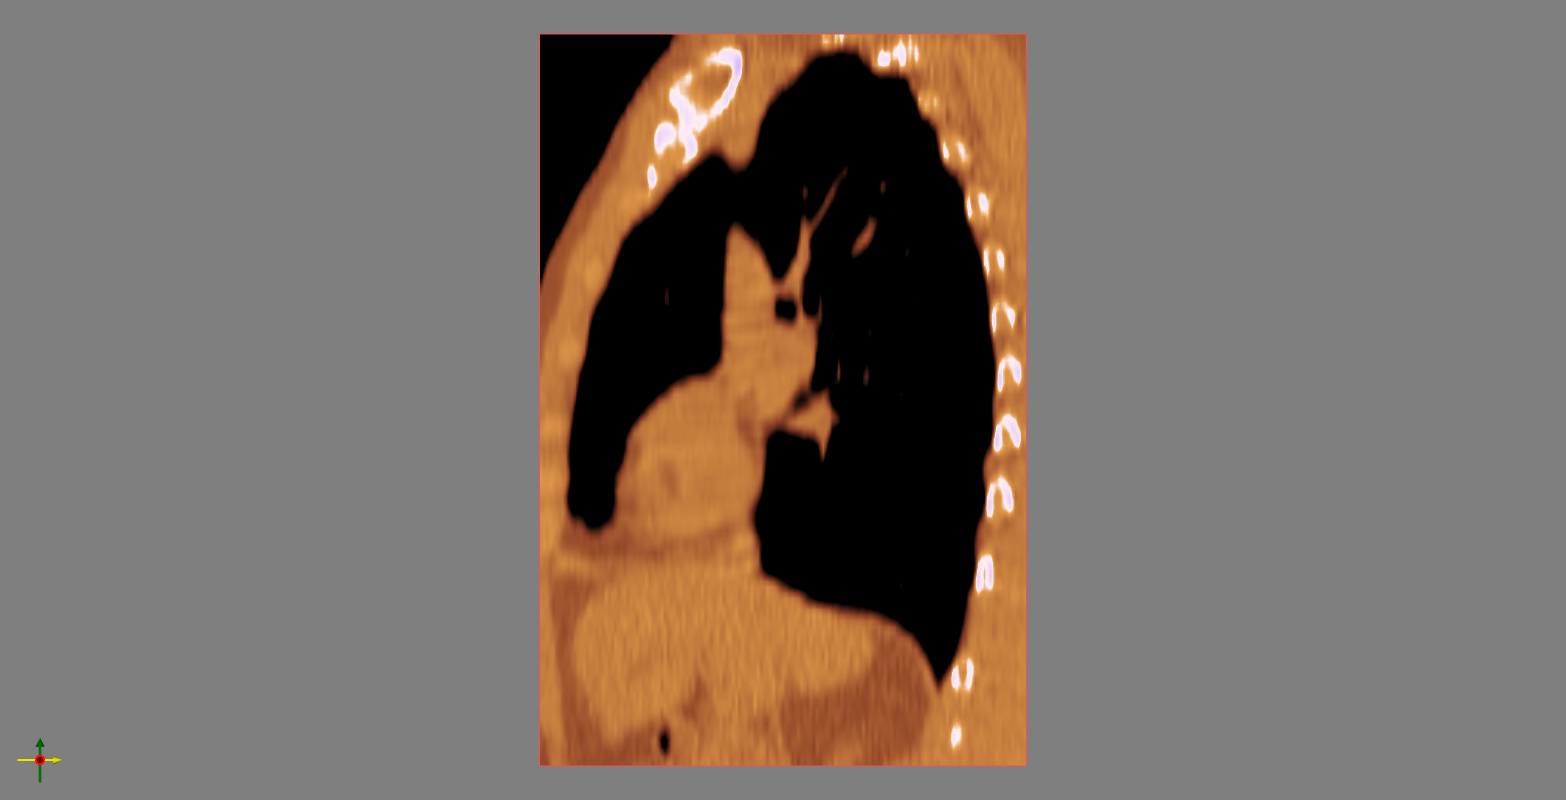
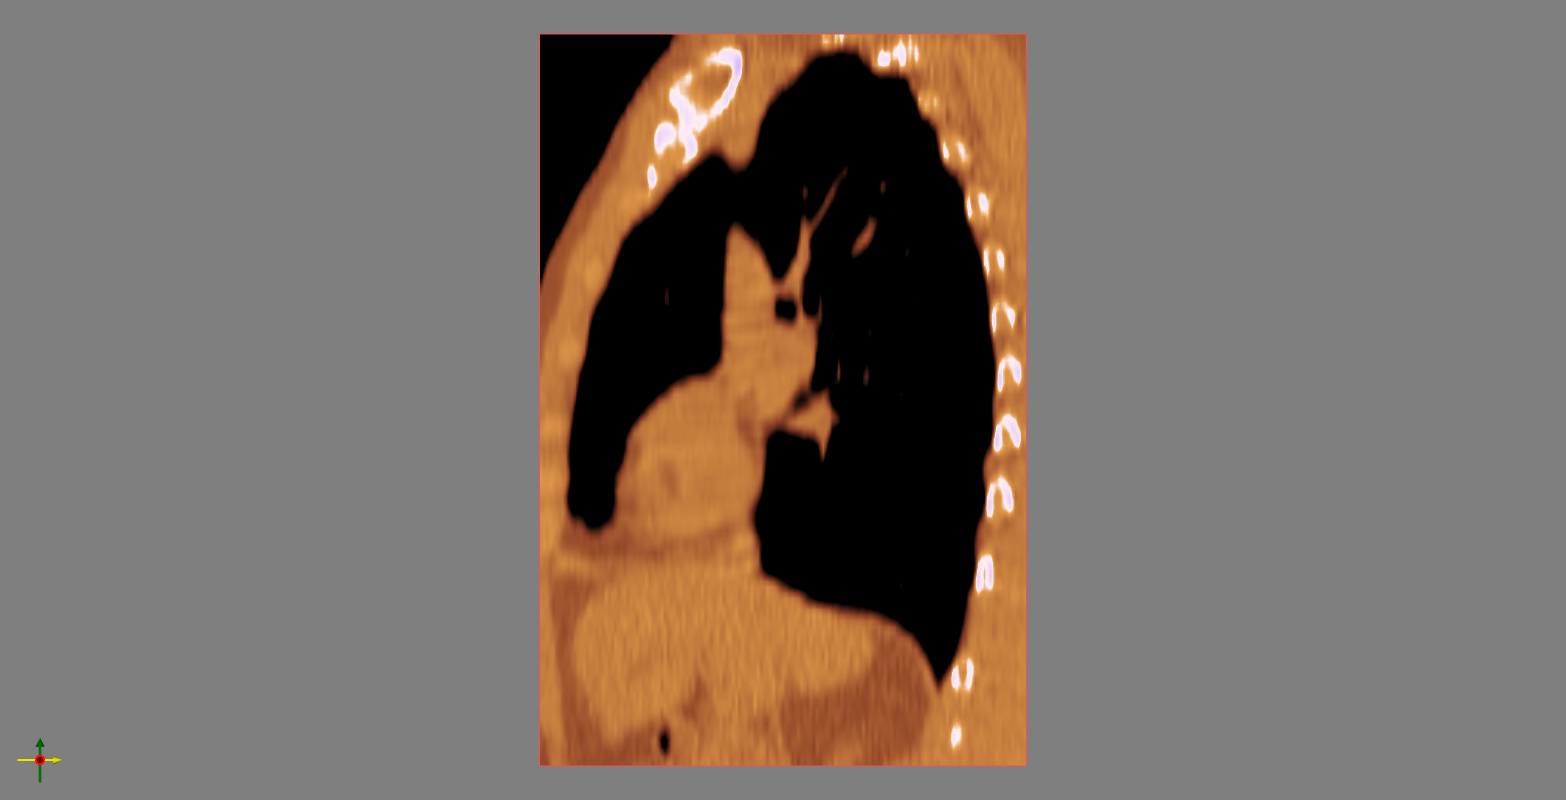

<IPython.core.display.Javascript object>

In [3]:
fixed_image = itk.imread("data/CT_3D_lung_fixed.mha")

view(fixed_image)

The CT image provides radiodensity in [Hounsefield units](https://en.wikipedia.org/wiki/Hounsfield_scale); lung tissue approaches -1000 in intensity, the value for air, and soft tissue is slightly above 0 intensity, the value for water.


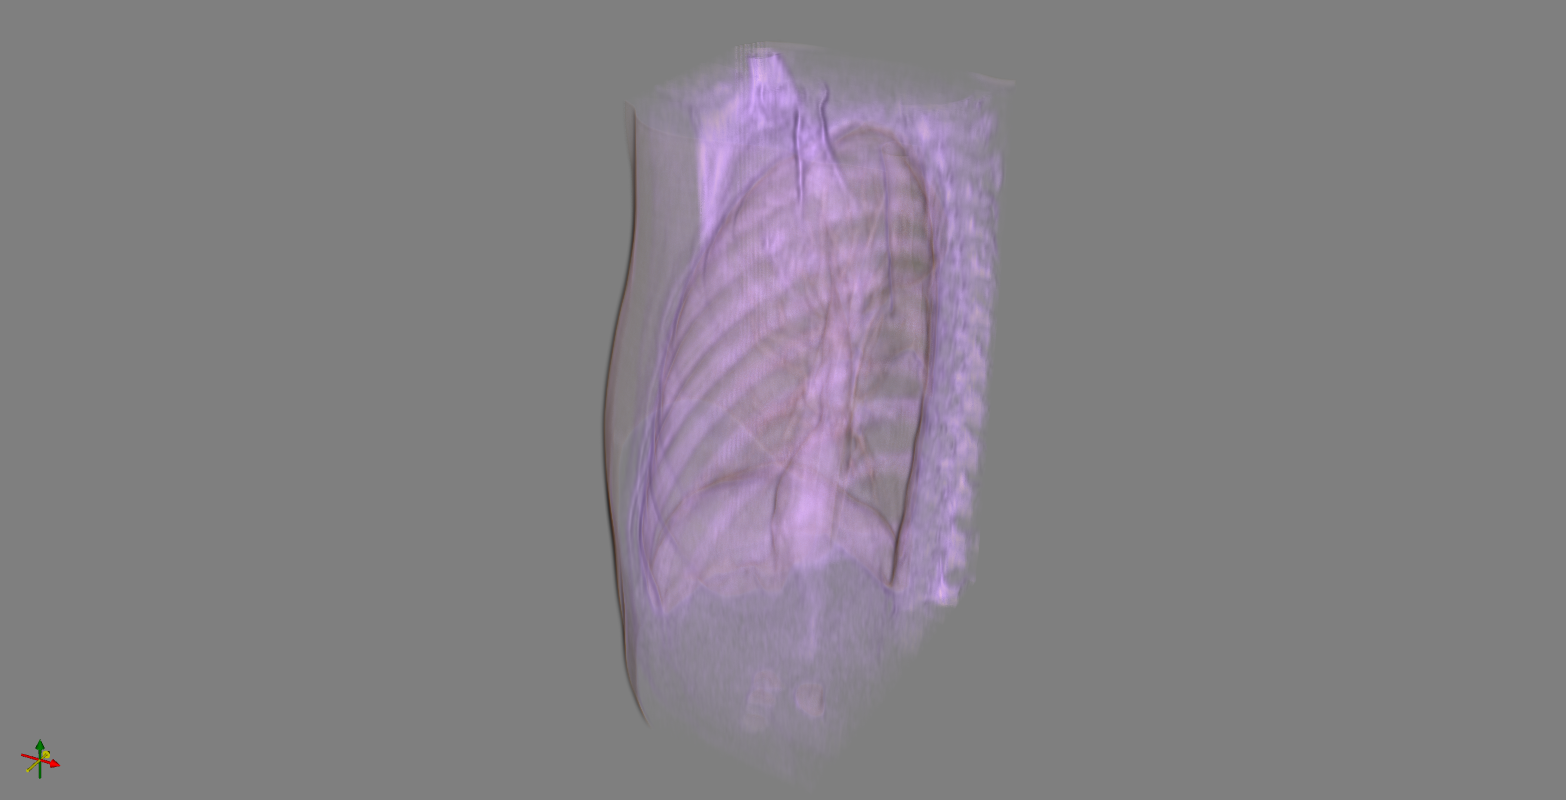
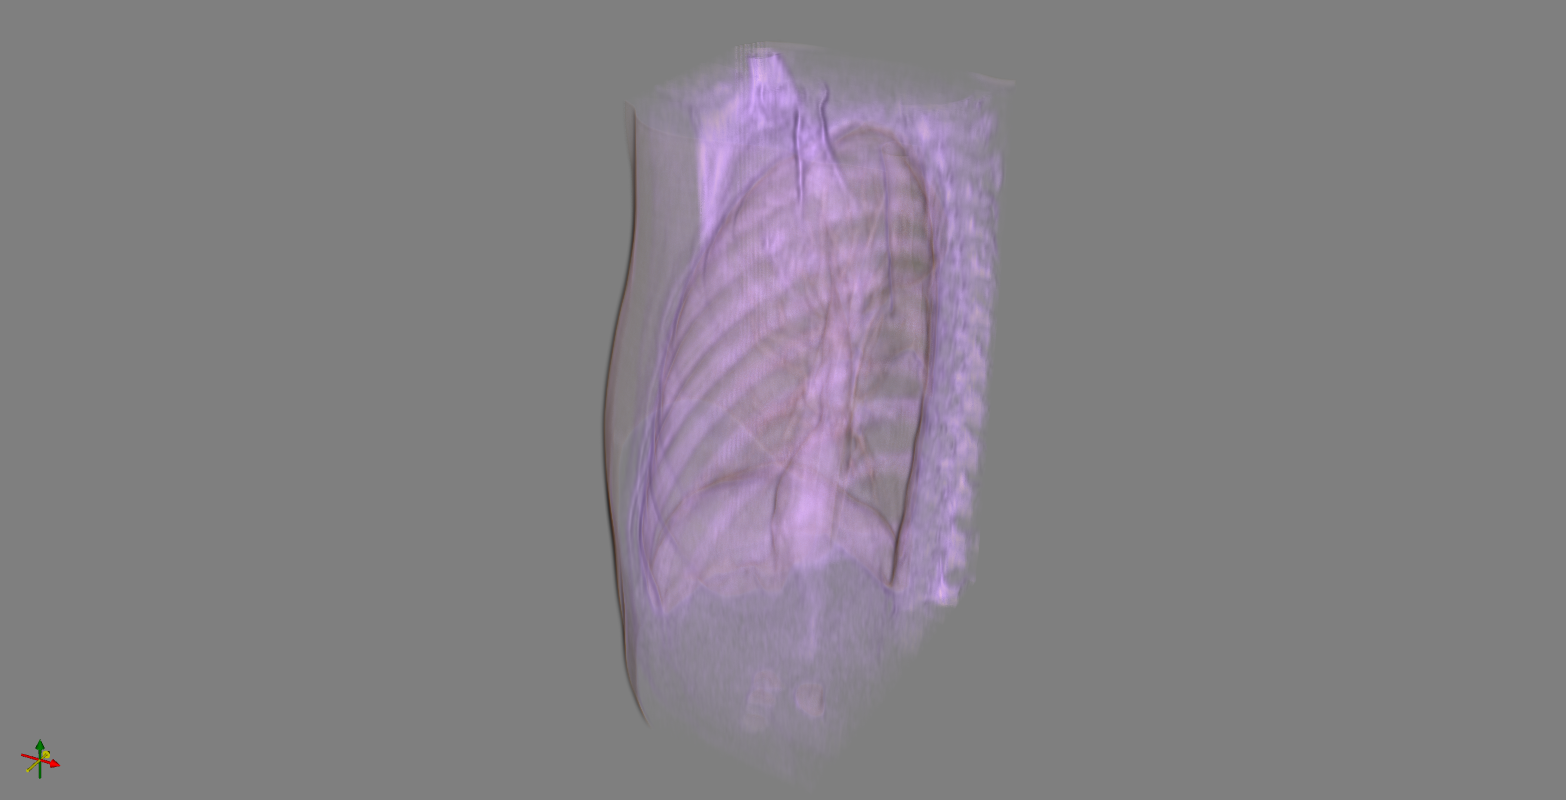

<IPython.core.display.Javascript object>

In [4]:
view(fixed_image, vmax=-300, gradient_opacity=0.5)


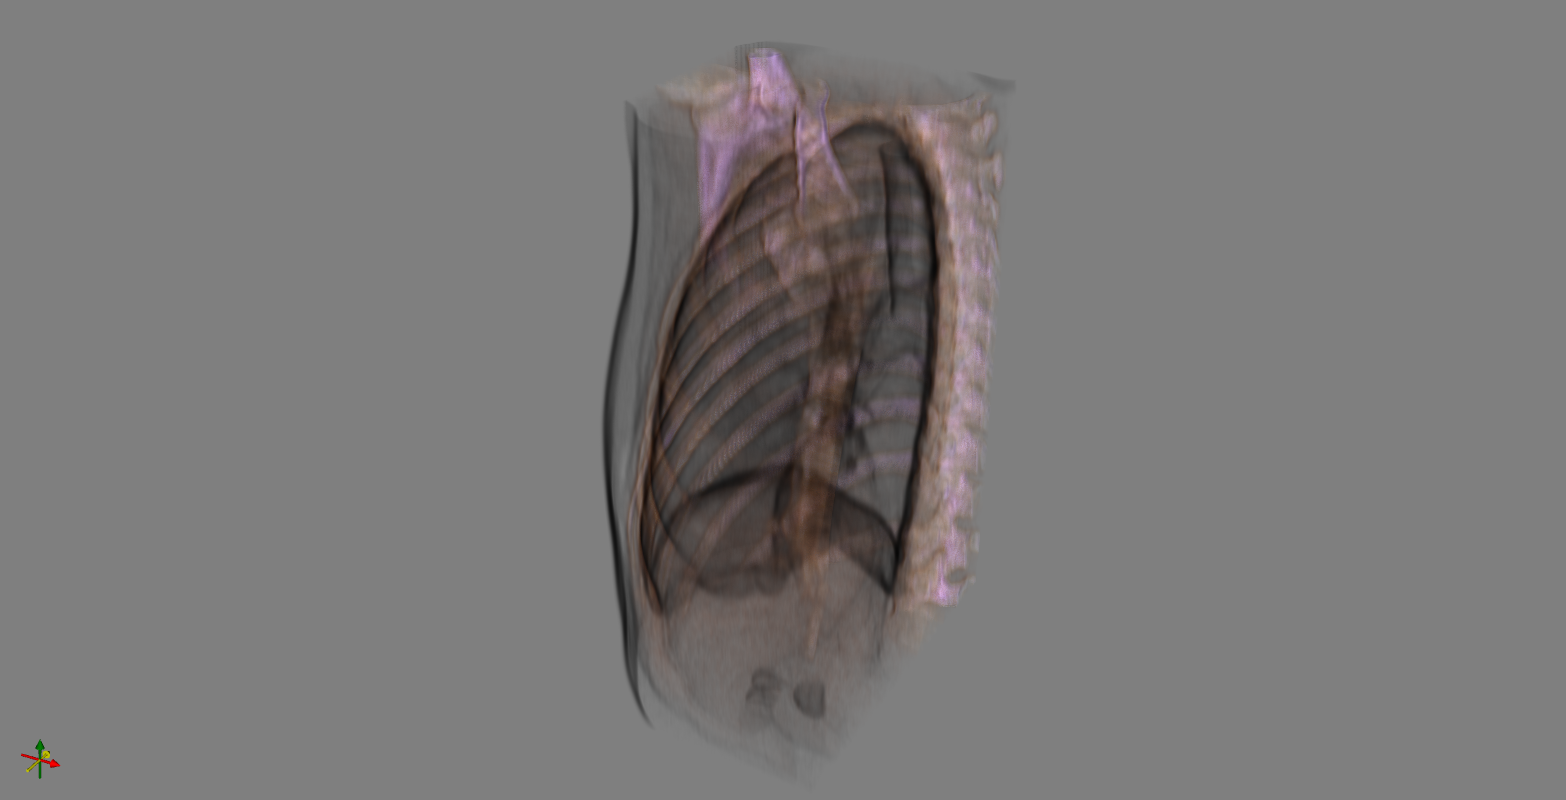
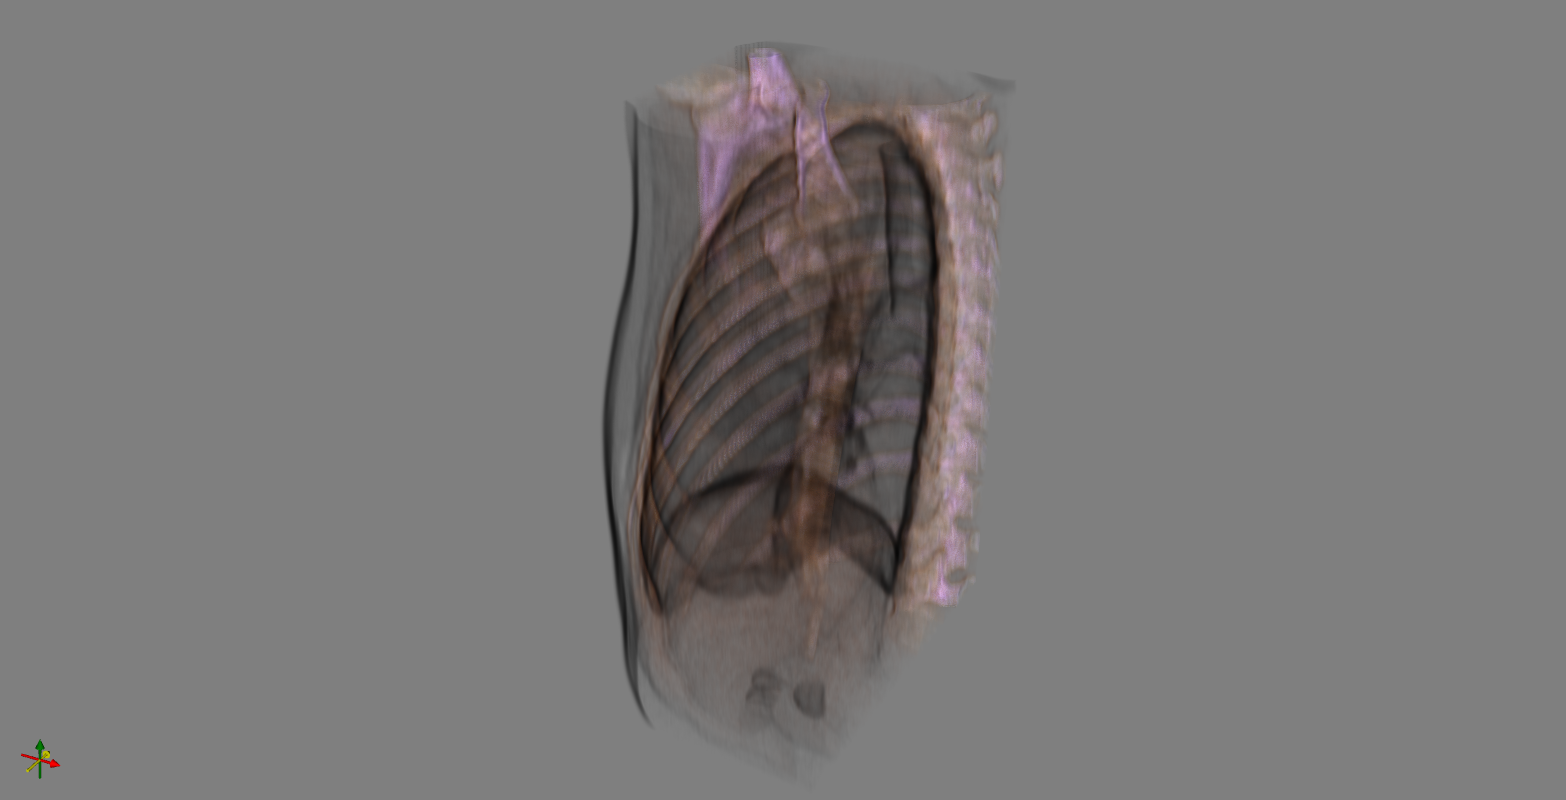

<IPython.core.display.Javascript object>

In [5]:
view(fixed_image, vmin=-50, vmax=500)

itkVectorD3 ([1.366, 1.366, 2.5])



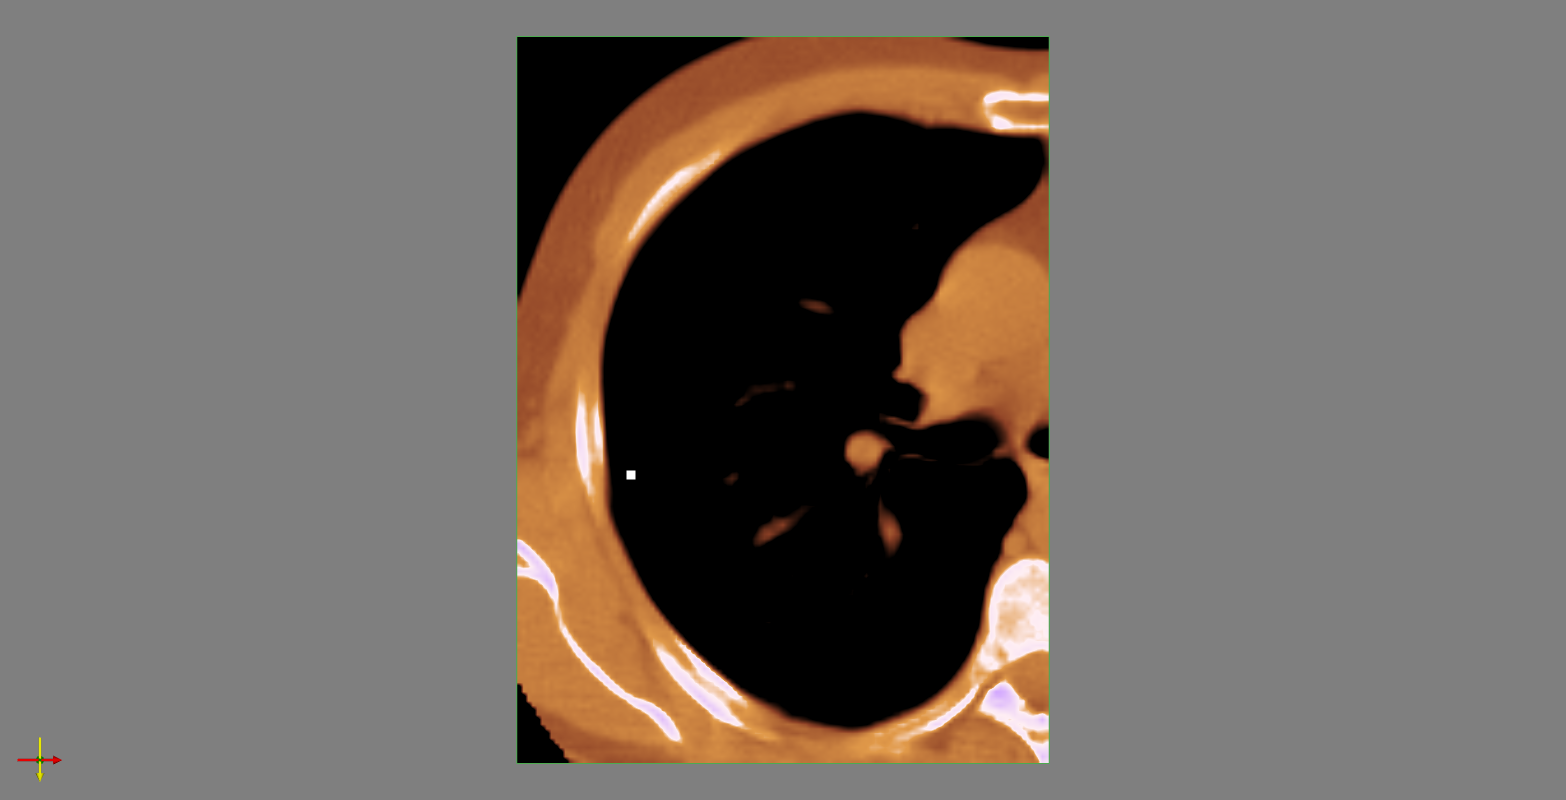
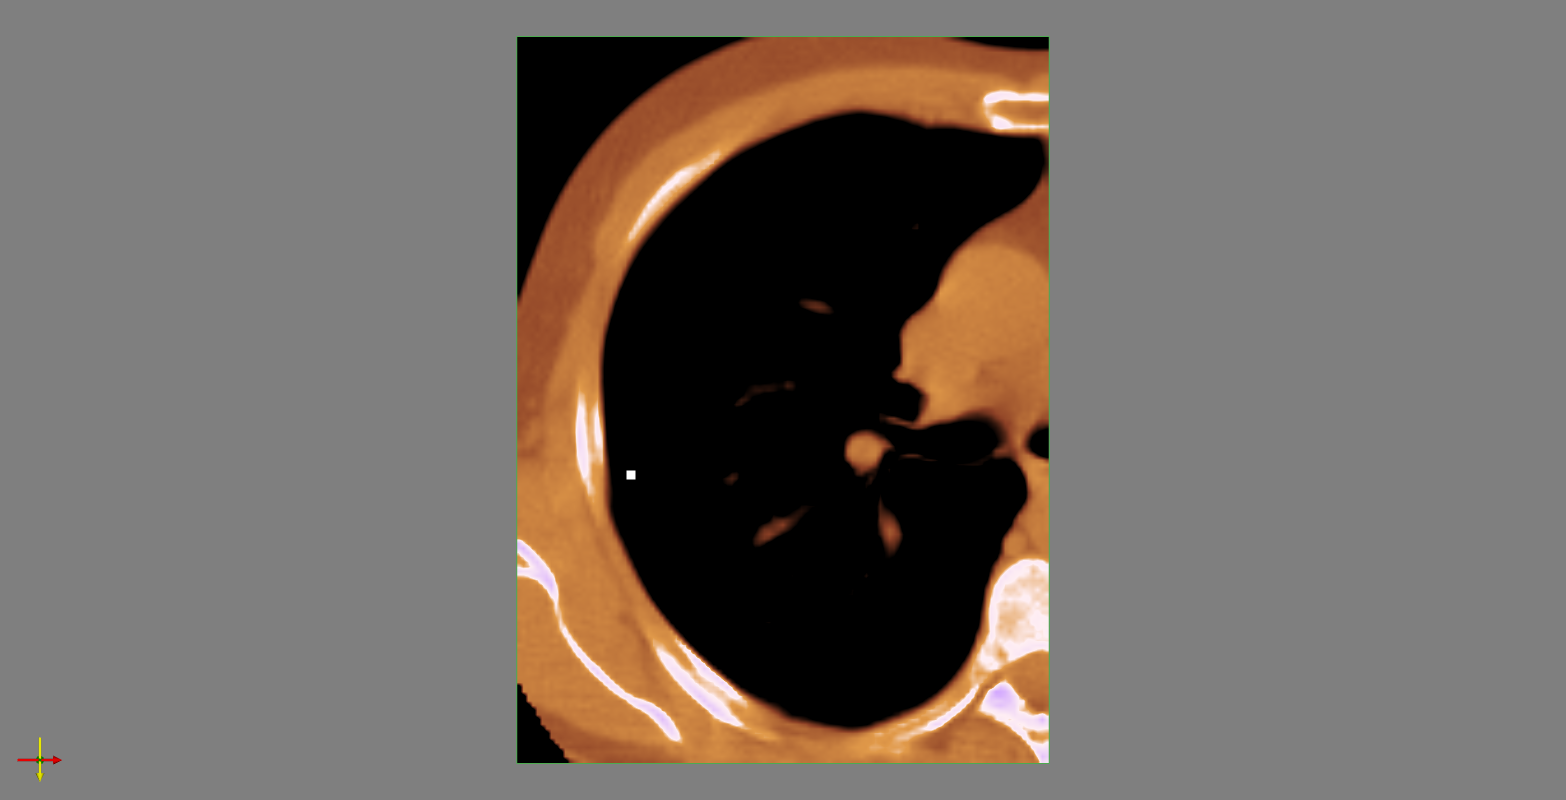

<IPython.core.display.Javascript object>

In [7]:
print(fixed_image.GetSpacing())

view(fixed_image)

**Take-home observations**:

- The resolution is anisotropic; resolution is higher in-plane versus out-of-plane.
- The pixel type is signed short: registration requires supporting this pixel type and interpolating samples between these pixels.

We **conceptualize** a **spatial image** as a **uniform grid of pixels** or **pixel grid** that lives is physical space.

Let's continue [with this presentation](https://docs.google.com/presentation/d/1Mo_yHmJ7Uai2DKAO2VTyAm56V9KdI-Wx5xVgc9gljmQ/edit?usp=sharing).

### Exercise: Lung image size

There are two 3D CT lung images, sampled on different image grids:

1. *data/CT_3D_lung_fixed.mha*
2. *data/CT_3D_lung_fixed_small.mha*

Which is larger in terms of its:

* File size?
* Spatial domain?
* Resolution?

How much less time will it take to register *CT_3D_lung_fixed_small.mha* to *CT_3D_lung_moving.mha*?

In [6]:
!ls data/CT*mha

data/CT_3D_lung_fixed.mha	 data/CT_3D_lung_moving.mha
data/CT_3D_lung_fixed_small.mha


### Enjoy ITK!